# Applying Fake-Authentic Classifier Over Facebook Political Ads

## Context:

## Problem: https://projects.propublica.org/facebook-ads/

## Question: 

## Methodology:


## Part 1: Learning a Classifier Model from Articles Review

In [1]:
!wget -c 'https://github.com/pitaconsumer/some-datasets/blob/master/572515_1037534_compressed_Fake.csv.zip?raw=true'
!wget -c "https://github.com/pitaconsumer/some-datasets/blob/master/572515_1037534_compressed_True.csv.zip?raw=true"
!unzip -o  "572515_1037534_compressed_Fake.csv.zip?raw=true"
!unzip -o "572515_1037534_compressed_True.csv.zip?raw=true"

--2020-07-29 01:09:07--  https://github.com/pitaconsumer/some-datasets/blob/master/572515_1037534_compressed_Fake.csv.zip?raw=true
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/pitaconsumer/some-datasets/raw/master/572515_1037534_compressed_Fake.csv.zip [following]
--2020-07-29 01:09:07--  https://github.com/pitaconsumer/some-datasets/raw/master/572515_1037534_compressed_Fake.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/pitaconsumer/some-datasets/master/572515_1037534_compressed_Fake.csv.zip [following]
--2020-07-29 01:09:07--  https://raw.githubusercontent.com/pitaconsumer/some-datasets/master/572515_1037534_compressed_Fake.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.64.133

In [ ]:
!pip install spacy tqdm

In [ ]:
!python -m spacy download en_core_web_lg

In [ ]:
!pip install textblob

In [ ]:
!pip install preprocessor

In [ ]:
!pip install seaborn

In [116]:
!pip install wordcloud

     |████████████████████████████████| 364 kB 337 kB/s eta 0:00:01


In [1]:
import spacy 
import en_core_web_lg

spacy.prefer_gpu()
nlp = en_core_web_lg.load()

In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm
tqdm.pandas(desc="progress bar")


import preprocessor
from textblob import TextBlob
import statistics
from typing import List


import scipy

import spacy
import nltk
import re

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer

## Part 1 (Move up to explain before constructing RFC)
### Importing first Facebook dataset to argue for business case.

### Descriptive Statistics: Average Dollars Spent on Facebook Ads
From another dataset.

In [93]:
#Formerly known as fb_likes = pd.read_csv('/Users/mehrunisaqayyum/Downloads/pseudo_facebook.csv')
fb_likes = pd.read_csv('pseudo_facebook.csv')
fb_likes

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [91]:
#Formerly known as clicks_df = pd.read_csv('/Users/mehrunisaqayyum/Downloads/datasets_104115_247225_data.csv')
clicks_df = pd.read_csv('datasets_104115_247225_data.csv')
clicks_df

,ad_id,reporting_start,reporting_end,campaign_id,fb_campaign_id,age,gender,interest1,interest2,interest3,impressions,clicks,spent,total_conversion,approved_conversion
0,708746,17/08/2017,17/08/2017,916,103916,30-34,M,15,17,17,7350.000000,1,1.43,2.0,1.0
1,708749,17/08/2017,17/08/2017,916,103917,30-34,M,16,19,21,17861.000000,2,1.82,2.0,0.0
2,708771,17/08/2017,17/08/2017,916,103920,30-34,M,20,25,22,693.000000,0,0.00,1.0,0.0
3,708815,30/08/2017,30/08/2017,916,103928,30-34,M,28,32,32,4259.000000,1,1.25,1.0,0.0
4,708818,17/08/2017,17/08/2017,916,103928,30-34,M,28,33,32,4133.000000,1,1.29,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1314410,19/08/2017,19/08/2017,45-49,F,109,111,114,1129773,252,358.189997,13,2.00,NaN,NaN
1139,1314411,19/08/2017,19/08/2017,45-49,F,110,111,116,637549,120,173.880003,3,0.00,NaN,NaN
1140,1314412,19/08/2017,19/08/2017,45-49,F,111,113,117,151531,28,40.289999,2,0.00,NaN,NaN
1141,1314414,17/08/2017,17/08/2017,45-49,F,113,114,117,790253,135,198.710000,8,2.00,NaN,NaN


In [94]:
clicks_df.columns

Index(['ad_id', 'reporting_start', 'reporting_end', 'campaign_id',
       'fb_campaign_id', 'age', 'gender', 'interest1', 'interest2',
       'interest3', 'impressions', 'clicks', 'spent', 'total_conversion',
       'approved_conversion'],
      dtype='object')

### Feature Description: Second Facebook Dataset

ad_id is the id of specific ad set | Numeric

Reporting_start and reporting_end are the start and end dates of the each ad | Numeric

Campaign_id is the id assigned by the ad running company | Numeric- Negligible

fb_campaign_id is the id assigned by facebook for every ad set| Numeric- Negligible

age and gender talk about the demographics | Categorical

Interest1, Interest2, Interest3 are the user interests and likes of facebook users who were targeted for the ad | Categorical 

Impressions are the number of times the ad was shown to the users |Numeric

Clicks is the number of time users clicked on the ad | Numeric

spent is the amount of money spent on each campaign | Numeric

Totalconversions is the number of users who have clicked the ad and have made a purchase or installed an app
approved_conversions tells how many became actual active users | Numerica

In [95]:
#Used 'clicks' and 'spent' to calculate the cost per click and per ad.

click_count_per_add = clicks_df.clicks.sum()/clicks_df.clicks.count()
click_ratio = (clicks_df.spent.sum()/63)/clicks_df.clicks.count()
ad_spend_count_ratio = (clicks_df.spent.sum()/63)/clicks_df.clicks.count()
print('Total number of Ads purcheased by IRA from 2015 to 2017: ', clicks_df.clicks.count())
print('Total dollar spent by IRA from 2015 to 2017: ${:.2f}'.format(clicks_df.spent.sum()/63))
print('Average cost per Ad: ${:.2f}'.format(ad_spend_count_ratio))
print('Average number of clicks per Ad: {:.2f}'.format(click_count_per_add))
print('Avg cost per click: ${:.2f}'.format(click_ratio))

Total number of Ads purcheased by IRA from 2015 to 2017:  1143
Total dollar spent by IRA from 2015 to 2017: $319.27
Average cost per Ad: $0.28
Average number of clicks per Ad: 11.63
Avg cost per click: $0.28


## Part 2: Supervised Learning~Developing a Fake-True Classifier 

In [3]:
fake_df = pd.read_csv('Fake.csv')

In [4]:
%time fake_df.shape

CPU times: user 21 µs, sys: 0 ns, total: 21 µs
Wall time: 25 µs


(23481, 4)

In [6]:
true_df = pd.read_csv("True.csv") #question to Tiago ;p[]

In [7]:
fake_vectors = fake_df['text'].progress_apply(lambda x: pd.Series(nlp(x).doc.vector.tolist()))

progress bar: 100%|██████████| 23481/23481 [23:46<00:00, 16.45it/s]


In [8]:
true_vectors = true_df['text'].progress_apply(lambda x: pd.Series(nlp(x).doc.vector.tolist()))

progress bar: 100%|██████████| 21417/21417 [22:27<00:00, 15.90it/s]


In [9]:
fake_vectors['y'] = 0
true_vectors['y'] = 1

In [9]:
fake_vectors.to_pickle('fake_vectors.pickle')
true_vectors.to_pickle('true_vectors.pickle')

In [10]:
true_df['y'] = 1
fake_df['y'] = 0

all_df= pd.concat([true_df, fake_df], ignore_index=True)

In [11]:
all_df

,title,text,subject,date,y
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


## Method 1: Testing Bag of Words Model
We will compare and contrast results of using Random Forest Classifier with BOW method 

In [ ]:
#Do I open pick from here?


In [12]:
#Need to import library for Stop Words
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
#Tokenize text for real news 

def clean_text(text):
    text = text.lower()
    #pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
    #token = word_tokenize(text)
    words = [word for word in text.split(" ") if word.isalpha()]
    stop_words = set(stopwords.words("english"))
    stop_words.discard("not")
    PS = PorterStemmer()
    words = [PS.stem(w) for w in words if w not in stop_words]
    words = ' '.join(words)
    return words

In [14]:
print(all_df['text'].head(1).apply(clean_text))

0    washington head conserv republican faction vot...
Name: text, dtype: object


In [15]:
# Let's take a look at the updated text
all_df['updated_text'] = all_df['text'].apply(clean_text)

In [16]:
all_df[['updated_text', 'text']]

,updated_text,text
0,washington head conserv republican faction vot...,WASHINGTON (Reuters) - The head of a conservat...
1,washington transgend peopl allow first time en...,WASHINGTON (Reuters) - Transgender people will...
2,washington special counsel investig link russi...,WASHINGTON (Reuters) - The special counsel inv...
3,washington trump campaign advis georg papadopo...,WASHINGTON (Reuters) - Trump campaign adviser ...
4,presid donald trump call postal servic friday ...,SEATTLE/WASHINGTON (Reuters) - President Donal...
...,...,...
44893,centuri wire say report earlier unlik mishap t...,21st Century Wire says As 21WIRE reported earl...
44894,centuri wire say familiar whenev disput chang ...,21st Century Wire says It s a familiar theme. ...
44895,patrick henningsen centuri wirerememb obama ad...,Patrick Henningsen 21st Century WireRemember ...
44896,centuri wire say al jazeera america go histori...,21st Century Wire says Al Jazeera America will...


In [17]:
from collections import Counter

c = Counter()

ignore_this = all_df['updated_text'].apply(lambda row: c.update(row.split(" ")))

In [18]:
top_words = c.most_common(50)
top_words

[('trump', 102168),
 ('said', 93217),
 ('not', 78912),
 ('would', 54617),
 ('presid', 48109),
 ('state', 46619),
 ('peopl', 34875),
 ('republican', 34816),
 ('one', 34268),
 ('also', 30633),
 ('say', 30570),
 ('new', 30522),
 ('like', 28222),
 ('donald', 27063),
 ('democrat', 24948),
 ('unit', 24743),
 ('govern', 24724),
 ('hous', 24674),
 ('call', 23768),
 ('could', 23673),
 ('nation', 23665),
 ('told', 23203),
 ('support', 22743),
 ('make', 22692),
 ('go', 22408),
 ('report', 21961),
 ('clinton', 21918),
 ('obama', 21904),
 ('white', 21893),
 ('time', 20909),
 ('last', 20680),
 ('american', 20642),
 ('year', 20288),
 ('get', 20121),
 ('senat', 20017),
 ('use', 19858),
 ('includ', 19463),
 ('two', 19337),
 ('offici', 18983),
 ('want', 18751),
 ('take', 18538),
 ('campaign', 18196),
 ('polit', 18154),
 ('vote', 18111),
 ('elect', 17991),
 ('even', 17976),
 ('former', 17596),
 ('parti', 17574),
 ('news', 17495),
 ('first', 17437)]

## Visualizing Top Words
Plot the top 50 words identified within the fake and real news datasets.
Trump, said,state', 
'peopl', 
 'republican','one', 'also', 'say', 'new','like','donald', 'democrat', 'unit', 'govern', 
 'hous', 
 'call', 'could','nation', 'told', 'support', 'make', 'go', 'report', 'clinton','obama','white','time', 'last', 'american', 'year', 'get', 
 'senat',
 'use',
 'includ', 
 'two', 
 'offici', 
 'want', 'take', 'campaign', 
 'polit',
 'vote', 'elect', 'even', 'former', 
 'parti', 
 'news', 'first', 

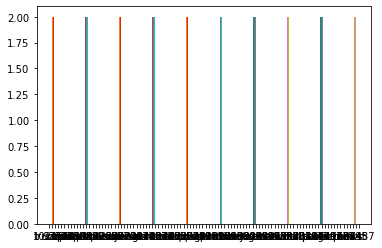

In [75]:
x = top_words
plt.hist(x, bins = 10)
plt.show()

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
bag_of_words_fake_real = vectorizer.fit_transform(all_df['updated_text'])

In [20]:
len(vectorizer.get_feature_names())

59069

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
bag_of_words_fake_real.shape

(44898, 59069)

In [26]:
all_df['y'].shape

(44898,)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(bag_of_words_fake_real, all_df['y'],
                                                    random_state=42,
                                                    test_size=0.33)

In [29]:
y_train.shape

(30081,)

In [36]:
from sklearn.ensemble import RandomForestClassifier

rfc_bag = RandomForestClassifier()

rfc_bag.fit(X_train, y_train)

RandomForestClassifier()

In [37]:
rfc_bag.score(X_train, y_train)

1.0

In [38]:
rfc_bag.score(X_test, y_test)

0.9726665316865762

### Word Cloud of Top 50 Words

In [119]:
?WordCloud

In [33]:
# most_common() produces k frequently encountered in: all_df['updated_text'](10) 
# input values and their respective counts. 
most_occur = Counter.most_common(top_words)

print(most_occur)

AttributeError: 'list' object has no attribute 'items'

### Plot the Word Cloud

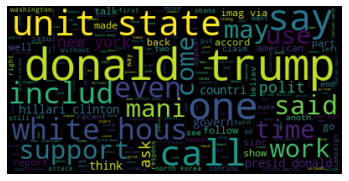

In [39]:
from wordcloud import WordCloud
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
#% matplotlib inline

#c:\intelpython3\lib\site-packages\matplotlib\__init__.py:

import warnings
warnings.filterwarnings("ignore")

text_wc_visual = " ".join(text for text in all_df.updated_text)
# Create and generate a word cloud image: wordcloud = WordCloud().generate(text)

wordcloud_BOW = WordCloud().generate(text_wc_visual)
#wordcloud_BOW = WordCloud(width = 500, 
                      #contour_color = "purple",
                      #height= 300, 
                      #random_state = 21,
                      #max_words = 30,
                      #max_font_size =110).generate(top_words)
                    
plt.imshow(wordcloud_BOW, interpolation='bilinear')
plt.axis("off")
plt.show()                    

## METHOD TWO: NLTK


## Testing Text Vector (spacy library) Method
We will compare and contrast results of using Random Forest Classifier from BOW method with results from Text Vector method. 

In [35]:
#Problem Code
from nltk import TreebankWordTokenizer
tokenizer = TreebankTokenizer()
train['tokens'] = train['text'].map(tokenizer.tokens)

NameError: name 'TreebankTokenizer' is not defined

In [40]:
all_vectors = pd.concat([fake_vectors, true_vectors], ignore_index=True)

In [41]:
#Method 2 requires that X and y be trained as X2_, and y2_
X2_train, X2_test, y2_train, y2_test = train_test_split(all_vectors.drop(columns=['y']), 
                                                    all_vectors['y'], 
                                                    random_state=42,
                                                    test_size=0.33)

In [42]:
#Run a random forest classifier on vectors
y2_train.shape

(30081,)

In [43]:
#Classifier for Method 2 using vectors
rfc_vectors = RandomForestClassifier()

rfc_vectors.fit(X2_train, y2_train)

RandomForestClassifier()

In [41]:
#Apply classifier to X2 and y2 training set and obtain 'Score'.
rfc_vectors.score(X2_train, y2_train)

0.999966756424321

In [42]:
#Apply classifier to X2 and y2 testing set and obtain 'Score'.
rfc_vectors.score(X2_test, y2_test)

0.970169400013498

# Part 2: Facebook Political Ads Classified Into Fake Versus Authentic Via Random Forest Model 

#### CLF from Training of fake data sets
#### Predict outcomes for Facebook 
    Y_fb_pred = clf.fit(X_train_fake, Y_train_true).predict(X_test_fb_pol)
clf.fit(X_fb_pol, Y_fb_pred).  #Test Set is FB Dataset

In [ ]:
!pip install nltk

In [44]:
#from wordcloud import WordCloud,STOPWORDS
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

import re,string,unicodedata
from nltk.stem import WordNetLemmatizer,PorterStemmer
import os
import gc
from nltk.tokenize import word_tokenize
from collections import  Counter

#stop = set(stopwords.words('english'))
#punctuation = list(string.punctuation)
#stop.update(punctuation)

In [45]:
fb = pd.read_csv('fbpac-ads-en-US.csv.xz', dtype={'message': 'string', 'title': 'string', 'paid_for_by':'string'}) #'/Users/mehrunisaqayyum/Downloads/work/fbpac.csv'
fb

,id,html,political,not_political,title,message,thumbnail,created_at,updated_at,lang,...,suppressed,targets,advertiser,entities,page,lower_page,targetings,paid_for_by,targetedness,listbuilding_fundraising_proba
0,hyperfeed_story_id_5c9baa3ee0ec08073500042,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 16:52:25.625455+00,2019-03-27 16:52:25.625455+00,en-US,...,f,[],NaN,"[{""entity"": ""Endangered Species Act"", ""entity_...",https://www.facebook.com/LCVoters/,https://www.facebook.com/lcvoters/,NaN,League of Conservation Voters,NaN,0.647945
1,hyperfeed_story_id_5c9bb2a2413852086735771,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,Indivisible Guide,<p>The Mueller investigation is over. Special ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:28:14.096849+00,2019-03-27 17:28:14.096849+00,en-US,...,f,[],NaN,"[{""entity"": ""Americans"", ""entity_type"": ""Group...",https://www.facebook.com/indivisibleguide/,https://www.facebook.com/indivisibleguide/,NaN,Indivisible Project,NaN,0.350635
2,hyperfeed_story_id_5c9bb4fa461731e29426627,"<div class=""_5pa- userContentWrapper""><div cla...",0,0,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:38:23.101377+00,2019-03-27 17:38:23.101377+00,en-US,...,f,[],NaN,"[{""entity"": ""Zimbabwe"", ""entity_type"": ""Region""}]",https://www.facebook.com/InternationalRescueCo...,https://www.facebook.com/internationalrescueco...,NaN,International Rescue Committee,NaN,0.999909
3,23843380741530360,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,Covenant House International,<p>What more can you do in the final hours of ...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-12-30 20:59:13.879124+00,2018-12-30 20:59:13.879124+00,en-US,...,f,"[{""target"": ""Activity on the Facebook Family""}...",Covenant House International,[],https://www.facebook.com/CovenantHouse/,https://www.facebook.com/covenanthouse/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...",Covenant House International,5.0,NaN
4,hyperfeed_story_id_5c9bb059454851c17741213,"<div class=""_5pa- userContentWrapper""><div cla...",0,1,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2019-03-27 17:18:29.764002+00,2019-04-11 15:02:58.081112+00,en-US,...,f,[],NaN,"[{""entity"": ""Planned Parenthood"", ""entity_type...",https://www.facebook.com/PlannedParenthood/,https://www.facebook.com/plannedparenthood/,NaN,Planned Parenthood Federation of America,NaN,0.999977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162319,23843108782710078,"<div class=""_5pcr userContentWrapper""><div cla...",12,0,Keep Them Accountable,<p>Rep. Katko voted for tax breaks for his wea...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-19 10:31:52.466563+00,2018-10-22 11:40:06.24382+00,en-US,...,f,"[{""target"": ""Age"", ""segment"": ""18 and older""},...",Keep Them Accountable,"[{""entity"": ""Katko"", ""entity_type"": ""Person""}]",https://www.facebook.com/KeepThemAccountable18/,https://www.facebook.com/keepthemaccountable18/,"{""<div><div class=\""_4-i0 _26c5\""><div class=\...","HOUSE MAJORITY PAC, (202) 849-6052, AND PRIORI...",7.0,0.116965
162320,23843034525850259,"<div class=""_5pcr userContentWrapper""><div cla...",0,0,National Republican Congressional Committee,<p>Illinois early voting is open NOW &amp; you...,https://pp-facebook-ads.s3.amazonaws.com/v/t1....,2018-10-24 20:41:42.111865+00,2018-10-24 20:41:42.111865+00,en-US,...,f,"[{""target"": ""List""}, {""target"": ""Age"", ""segmen...",National Republican Congressional Committee,"[{""entity"": ""Illinois"", ""entity_type"": ""Region...",https://www.facebook.com/NRCC/,https://www.facebook.com/nrcc/,"{""<div><d

In [17]:
fb.columns

Index(['id', 'html', 'political', 'not_political', 'title', 'message',
       'thumbnail', 'created_at', 'updated_at', 'lang', 'images',
       'impressions', 'political_probability', 'targeting', 'suppressed',
       'targets', 'advertiser', 'entities', 'page', 'lower_page', 'targetings',
       'paid_for_by', 'targetedness', 'listbuilding_fundraising_proba'],
      dtype='object')

In [32]:
fb.dtypes

id                                 object
html                               object
political                           int64
not_political                       int64
title                              string
message                            string
thumbnail                          object
created_at                         object
updated_at                         object
lang                               object
images                             object
impressions                         int64
political_probability             float64
targeting                          object
suppressed                         object
targets                            object
advertiser                         object
entities                           object
page                               object
lower_page                         object
targetings                         object
paid_for_by                        string
targetedness                      float64
listbuilding_fundraising_proba    

In [46]:
fe = ['title','message','paid_for_by']
text_fb = fb[fe]
text_fb.head(-10)

,title,message,paid_for_by
0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,League of Conservation Voters
1,Indivisible Guide,<p>The Mueller investigation is over. Special ...,Indivisible Project
2,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,International Rescue Committee
3,Covenant House International,<p>What more can you do in the final hours of ...,Covenant House International
4,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",Planned Parenthood Federation of America
...,...,...,...
162309,AFT - American Federation of Teachers,<p>Mike DeWine was elected as Ohio’s attorney ...,"AFT - American Federation of Teachers, not aut..."
162310,MoveOn,<p>We resisted and won control of the House! N...,"MoveOn.org Political Action, pol.moveon.org, n..."
162311,AAAS - The American Association for the Advanc...,"<p>Diversity in science, technology, and engin...",<NA>
162312,Nathan Fletcher for County Supervisor 2018,"<p>As Supervisor, I will stand up to the polit...",Nathan Fletcher for Supervisor 2018


### Text Cleaning
We will review text in columns 'title','message','paid_for_by' for our Natural Language Processing project.

In [47]:
'''Remove punctuation and "weird stuff like --" from ['title','message','paid_for_by'].'''

import re

def text_cleaner(text_fb):
    # Visual inspection identifies a form of punctuation spaCy does not
    # recognize: the double dash '--'.  Better get rid of it now!
    text1 = re.sub(r'--',' ',text_fb)
    text1 = re.sub("[\[].*?[\]]", "", text_fb)
    text1 = ' '.join(text_fb.split())
    return text1

In [30]:
pd.__version__

'1.0.4'

In [51]:
#need values to be strings 
text_fb.dtypes

title          string
message        string
paid_for_by    string
dtype: object

In [55]:
'''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
import re
import string

def clean_text_round1(text1):
    if pd.isna(text1):
        return text1
    
    text2 = text1.lower()
    text2 = re.sub('\[.*?\]', '', text1)
     #Add regex to address the 'p' where removing 'p' with brackets or remove first and last letter
    #text2 = re.sub('\p', ' ', text1)
    text2 = re.sub('\w*\d\w*', '', text1)
    text2 = re.sub('<.*?>', '', text1)
    text2 = re.sub('[%s]' % re.escape(string.punctuation), '', text1)
    return text2

# <.*?>

In [52]:
clean_text_round1("HERE IS SOME text for you to clean, sorry about the CAPS LOCK.")

'HERE IS SOME text for you to clean sorry about the CAPS LOCK'

In [54]:
#Test a 'message'
clean_text_round1(text_fb['message'].iloc[0])

'pBREAKING Trump’s Department of the Interior plans to remove Endangered Species Act protections for gray wolves Without these safeguards gray wolf populations could decline across the country We must fight back on this attack on our wildlifep'

In [56]:
#Del suggestion to test clean
#Creating new column 'clean_message'

text_fb['clean_message'] = text_fb.message.apply(clean_text_round1)

In [57]:
text_fb #See columns: ['message','clean_message']

,title,message,paid_for_by,clean_message
0,League of Conservation Voters,<p>BREAKING: Trump’s Department of the Interio...,League of Conservation Voters,pBREAKING Trump’s Department of the Interior p...
1,Indivisible Guide,<p>The Mueller investigation is over. Special ...,Indivisible Project,pThe Mueller investigation is over Special Cou...
2,International Rescue Committee,<p>Zimbabwe is reeling from the impact of Cycl...,International Rescue Committee,pZimbabwe is reeling from the impact of Cyclon...
3,Covenant House International,<p>What more can you do in the final hours of ...,Covenant House International,pWhat more can you do in the final hours of 20...
4,Planned Parenthood,"<p>Say it loud, say it proud: Our rights, our ...",Planned Parenthood Federation of America,pSay it loud say it proud Our rights our healt...
...,...,...,...,...
162319,Keep Them Accountable,<p>Rep. Katko voted for tax breaks for his wea...,"HOUSE MAJORITY PAC, (202) 849-6052, AND PRIORI...",pRep Katko voted for tax breaks for his wealth...
162320,National Republican Congressional Committee,<p>Illinois early voting is open NOW &amp; you...,the NRCC and not authorized by any candidate o...,pIllinois early voting is open NOW amp your ne...
162321,POW Action Fund,<p>From your favorite peaks to the polling pla...,Protect Our Winters Action Fund,pFrom your favorite peaks to the polling place...
162322,Beto O'Rourke,<p>Beto just announced he’s running for presid...,Beto for America,pBeto just announced he’s running for presiden...


In [57]:
re.sub('<.*?>', '', text_fb['message'].iloc[0])

'BREAKING: Trump’s Department of the Interior plans to remove Endangered Species Act protections for gray wolves. Without these safeguards, gray wolf populations could decline across the country. We must fight back on this attack on our wildlife.'

In [63]:
re.sub?

In [56]:
!pip install openpyxl

     |████████████████████████████████| 241 kB 359 kB/s eta 0:00:01
  Created wheel for et-xmlfile: filename=et_xmlfile-1.0.1-py3-none-any.whl size=8915 sha256=1f73d529fc9b17cf02a770da10fa7d392180cce473a31d91359a04e4ed3af474
  Stored in directory: /root/.cache/pip/wheels/ef/92/e0/956c00decf3091294b8800d9104f6169a1adacfaafd122ed42
Successfully built et-xmlfile


In [57]:
#Dataset = From text_fb sample of 200 
## Removed 'weights='paid_for_by''
your_sample_for_testing = text_fb.sample(n=200, random_state=123)
your_sample_for_testing.to_excel("your_sample_for_testing.xlsx")

In [58]:
text_fb.title.str.lower()
#applied lower case method to title column
#how to iterate over every row?

0                       league of conservation voters
1                                   indivisible guide
2                      international rescue committee
3                        covenant house international
4                                  planned parenthood
                             ...                     
162319                          keep them accountable
162320    national republican congressional committee
162321                                pow action fund
162322                                  beto o'rourke
162323                                           aclu
Name: title, Length: 162324, dtype: string

In [59]:
#Example: alice = text_cleaner(alice)
text_fb_nlp = clean_text_round1(text_fb)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [78]:
text_fb.dtypes

title            string
message          string
paid_for_by      string
clean_message    object
dtype: object

#### Methodology Note: 
We need to parse the cleaned data. The cleaned data represents the Facebook text in the 'message' column. We could include the 'title' column as well to match the 'title' with the corresponding message as a measure of checking authenticity the way the New York Times Challenge demonstrated.

Should we undertake: Topic Modeling?

In [79]:
# Parse the cleaned ads. This can take a bit.
nlp = spacy.load('en_core_web_lg')
#fb_ad_doc = nlp(text_fb_nlp)  #doc = nlp("string")
fb_ad_doc = nlp(text_fb['clean_message'])  #trying to place data--the text-- from column

#Iterate over tokens in a doc
#for token in fb_ad_doc:
 #   print(token.text) #print (token.text)
    
    #Don't forget sentences_df

TypeError: Argument 'string' has incorrect type (expected str, got Series)

### Top Fifty Words


In [63]:
#Identify top 50 words in Facebook Messages 'text_fb'
f = Counter()

#ignore_this = all_df['updated_text'].apply(lambda row: c.update(row.split(" ")))
ignore_this2 = text_fb['clean_message'].apply(lambda row: f.update(row.split(" ")))

In [64]:
top_words_fb = f.most_common(50)
top_words_fb

[('to', 324247),
 ('the', 296428),
 ('and', 213875),
 ('a', 193431),
 ('of', 150179),
 ('in', 128448),
 ('for', 117393),
 ('our', 93142),
 ('is', 91100),
 ('you', 83124),
 ('your', 65675),
 ('on', 64343),
 ('that', 61222),
 ('we', 58962),
 ('this', 52624),
 ('are', 50457),
 ('', 47720),
 ('with', 45055),
 ('be', 41170),
 ('will', 38976),
 ('have', 36604),
 ('from', 34164),
 ('pp', 32579),
 ('us', 32507),
 ('I', 31947),
 ('by', 31179),
 ('help', 31065),
 ('need', 30760),
 ('can', 30597),
 ('it', 29397),
 ('at', 27606),
 ('now', 26185),
 ('more', 25921),
 ('We', 24754),
 ('up', 24008),
 ('people', 23898),
 ('their', 22750),
 ('has', 22696),
 ('all', 22502),
 ('span', 21900),
 ('as', 21732),
 ('an', 20866),
 ('but', 20750),
 ('not', 20748),
 ('who', 20658),
 ('The', 19790),
 ('make', 19392),
 ('just', 19365),
 ('get', 19348),
 ('Trump', 19262)]

### WordCloud: Facebook Political Ad (Messages)
Reviewing top 50 words in messages.

In [65]:
# Create and generate a word cloud image: wordcloud = WordCloud().generate(text)
#text_wc_visual2 = " ".join(text for text in text_fb.clean_text)


wordcloud_BOW2 = WordCloud().generate(top_words_fb) #(text_wc_visual2)
#wordcloud_BOW = WordCloud(width = 500, 
                      #contour_color = "purple",
                      #height= 300, 
                      #random_state = 21,
                      #max_words = 30,
                      #max_font_size =110).generate(top_words)
                    
plt.imshow(wordcloud_BOW2, interpolation='bilinear')
plt.axis("off")
plt.show() 

TypeError: expected string or bytes-like object

## Part 3: Unsupervised Learning: Overlay Classifier on FB Political Advertisements


In [ ]:
#CLF from Training of fake data sets
 # Predict outcomes for Facebook 
    Y_fb_pred = clf.fit(X_train_fake, Y_train_true).predict(X_test_fb_pol)
clf.fit(X_fb_pol, Y_fb_pred).  #Test Set is FB Dataset

### Apply Method 1: Random Forest Classifier Applying Bag of Words
rfc_bag

### Apply Method 2: Random Forest Classifier Applying Vectors
rfc_vectors

In [ ]:
Y_fb_pred_B = 
rfc_vectors.fit(X2_train, y2_train)

In [ ]:
#Concatenating
fb_df2 = pd.concat([fb, fb_likes], ignore_index=True, sort =True)
fb_df2

In [ ]:
fb_df2.columns

In [ ]:
fb_df2.dtypes

### Observation: We have columns like "political", 'not_political', 'title' and 'message' of the advertisement; 'created at'; 'lang' for languages; 'political_probabilty', and 'paid_for_by'.

In [ ]:
fb.describe()

#### Observation
We see that we have 162,314 records of political ad data on Facebook. The last ten sample how ads were purchased by nonpartisan groups, like "League of Conservation Voters", political organizer groups, like "Indivisible Project", unions "AFT", and international nonprofits like "International Rescue Committee". 


### Parse the Text

### Pickle Data on Facebook ads

In [ ]:
# Let's pickle it for later use
data_df.to_pickle("corpus.pkl")

### Identify Stop Words

In [ ]:
stop=set(stopwords.words('english'))

def build_list(fb,col="title"):
    corpus=[]
    lem=WordNetLemmatizer()
    stop=set(stopwords.words('english'))
    new= fb[col].dropna().str.split()
    new=new.values.tolist()
    corpus=[lem.lemmatize(word.lower()) for i in new for word in i if(word) not in stop]
    
    return corpus

## Semantic Analysis: Turning FB message into Vectors
We note the stop words and review counts of words from tf-idf.

In [ ]:
# Turning FB message into Vectors
from sklearn.feature_extraction.text import TfidfVectorizer

X_train, X_test = train_test_split(emma_paras, test_size=0.4, random_state=0)

vectorizer = TfidfVectorizer(max_df=0.5, # drop words that occur in more than half the paragraphs
                             min_df=2, # only use words that appear at least twice
                             stop_words='english', 
                             lowercase=False, #don't convert everything to lower case (since proper names are people who are targeted in disinfo campaigns)
                             use_idf=True,#we definitely want to use inverse document frequencies in our weighting
                             norm=u'l2', #Applies a correction factor so that longer paragraphs and shorter paragraphs get treated equally
                             smooth_idf=True #Adds 1 to all document frequencies, as if an extra document existed that used every word once.  Prevents divide-by-zero errors
                            )


#Applying the vectorizer
fb_message_tfidf =vectorizer.fit_transform(text_fb)
print("Number of features: %d" % fb_message_tfidf.get_shape()[1])

#splitting into training and test sets
X_train_tfidf, X_test_tfidf= train_test_split(fb_message_tfidf, test_size=0.4, random_state=0)


#Reshapes the vectorizer output into something people can read
X_train_tfidf_csr = X_train_tfidf.tocsr()

#number of paragraphs
n = X_train_tfidf_csr.shape[0]
#A list of dictionaries, one per paragraph
tfidf_bypara = [{} for _ in range(0,n)]
#List of features
terms = vectorizer.get_feature_names()

print(terms)


In [ ]:
#for each paragraph, lists the feature words and their tf-idf scores
for i, j in zip(*X_train_tfidf_csr.nonzero()):
    tfidf_bypara[i][terms[j]] = X_train_tfidf_csr[i, j]

#Keep in mind that the log base 2 of 1 is 0, so a tf-idf score of 0 indicates that the word was present once in that sentence.
print('Original sentence:', X_train[5])
print('Tf_idf vector:', tfidf_bypara[5])

In [ ]:
corpus=build_list(text_fb)
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:20]:
    if (word not in stop) :
        x.append(word)
        y.append(count)

In [ ]:
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)
plt.title("most common word in title")

#### Observations:
Top 5 most common words are ranked:
    1) 'Committee'
    2)'International'
    3) 'Action' and 'Planned'
    4) 'Parenthood'
    
USA and 'America' are interchangeable--so maybe these are double-counting. 

'Democratic' not used as much as nonpolitical word of 'rescue'. However, we do not see 'Republican' or 'GOP'. 

'Beto' and'O'Rourke' are occuring at same rate. This is the only person to show up in this political ad data set. 

### Most Common 'Paid For By'

In [ ]:
corpus=build_list(text_fb,"paid_for_by")
counter=Counter(corpus)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:10]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
        
plt.figure(figsize=(9,7))
sns.barplot(x=y,y=x)
plt.title("Most Common Word in 'paid_for_by'")

### Figure of 'Number of Top Ad Titles'
To highlight the ads that we would should review for fake versus true classifier to strenghten business case for impact.

In [ ]:
def plot_count(feature, title,fb, size=1, show_percents=False):
    f, ax = plt.subplots(1,1, figsize=(4*size, 4))
    total = float(len(fb))
    g = sns.countplot(fb[feature],order = fb[feature].value_counts().index[0:20], palette='Set3')
    g.set_title("Number of {}".format(title))
    if (size > 2):
        plt.xticks(rotation=90, size=10)
    if(show_percents):
        for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width()/2.,
                   height + 3, '{:1.2f}%'.format(100*height/total),
                   ha="center")
    ax.set_xticklabels(ax.get_xticklabels());
    plt.show()

In [ ]:
plot_count('title','Top Ad Titles', text_fb, 3.5)
#plt.title("Number of Top Ad Titles")

### Figure: Number of Most Popular Messages

In [ ]:
#Note the number (counts) of message.
plot_count('message','message countplot', text_fb, 3.5)

## Bag of Words
Defining functions to identify most common words and the create features from those words in the text. We need to create a df of the "corpus".

In [ ]:
#We need to use fb_text_df.
 ##Do we need to create features from Bag of Words and vectorize them for the Random Forest Classifier?
def bag_of_words(text):
    allwords = [token.lemma_
               for token in text
               if not token.is_punct
               and not token.is_stop]
    return [item[0] for item in Counter(allwords).most_common(2000)]
print()


In [ ]:
def bow_features(sentences, common_words):
    fb_text_df = pd.DataFrame(columns=common_words)
    fb_text_df['text_sentence'] = sentences[0]
    fb_text_df['text_source'] = sentences[1]
    fb_text_df.loc[:,common_words] = 0
    
    for i, sentence in enumerate(df['text_sentence']):
        words = [token.lemma_ 
                for token in sentence
                if (
                    not token.is_punct
                    and not token.is_stop
                    and token.lemma_ in common_words
                )]
        for word in words:
            fb_text_df.loc[i, word] += 1
        if i%100 == 0:
            print('Processing row {}'.format(i))
    return fb_text_d

In [ ]:
#data means fb_text_df
top_words_in_ads_dict = {}
for c in fb_text_df.columns:
    top = fb_text_df[c].sort_values(ascending=False).head(30)
    top_words_in_ads_dict[c]= list(zip(top.index, top.values))

top_words_in_ads_dict

### Frequency of Words


In [ ]:
fb['message'].dtype

In [ ]:
fb.message.iloc[1:10]

In [ ]:
temp_variable = "".join(fb.message.iloc[1:1000])

### Convert sentences into numeric vectors.
We need to transform sentences into NUMERIC vectors so that the vectors can be included in a Random Forest Classifier model, which cannot use string values.

First we must create list.

In [ ]:
#List 

message_propoganda_list = []
for topic in [#Need to include topic_raw like physics_raw]:
    for sentence in topic['title','paid_for_by']['docs']: #What is docs?
        message_propoganda_list = message_propoganda_list + sentence['message']  #Used message_propaganda for abstract
        
  

In [ ]:
#Use spacy to count frequency of words

!python -m spacy download en_core_web_sm
nlp = spacy.load('en_core_web_sm')

# All the processing work is done here, so it may take a while.
FB_political_doc = nlp(temp_variable)
#FB_popuarity_doc = nlp()

In [ ]:
# Cleaned Text before Identifying 'Stopwords'
from collections import Counter

# Utility function to calculate how frequently words appear in the data sets.
def word_frequencies(text, include_stop=True):
    
    # Build a list of words.
    # Strip out punctuation and, optionally, stop words.
    words = []
    for token in text:
        if not token.is_punct and (not token.is_stop or include_stop):
            words.append(token.text)
            
    # Build and return a Counter object containing word counts.
    return Counter(words)
    
# The most frequent words:
political_freq = word_frequencies(temp_variable).most_common(10)
#like_freq = word_frequencies().most_common(10)
print('Political:', political_freq)
#print('Popular:', like_freq)

## Sentiment Analysis
Source: https://github.com/adashofdata/nlp-in-python-tutorial/blob/master/3-Sentiment-Analysis.ipynb Regarding text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to note with sentiment analysis.

TextBlob Module: Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels. Sentiment Labels: Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these. Polarity: How positive or negative a word is. -1 is very negative. +1 is very positive. Subjectivity: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion. For more info on how TextBlob coded up its sentiment function.

In [ ]:
fb_df2.loc[0:5, 'message']

In [ ]:
TextBlob('The Mueller investigation is over').sentiment


In [ ]:
# Create quick lambda functions to find the polarity and subjectivity of each message
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

fb_df2['polarity'] = fb_df2['message'].apply(pol)
fb_df2['subjectivity'] = fb_df2['title'].apply(sub)
fb_df2

In [ ]:
#Loop each 'message' value

for token in text